# Trabajo semanal 13:

1) Ejercicio 5 TP 7

Sintetice la siguiente transferencia cargada con componentes RC:

<img src="sint_transf_corriente_RC (1).png">

\begin{equation}
−\frac{I_2}{I_1}=H\frac{s^2+5s+4}{s^2+8s+12}
\end{equation}

\begin{equation}
Z_{21}=6H
\end{equation}

+ a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.
+ b) Calcular el valor de los componentes, es decir la síntesis analítica.

2) Dada la siguiente transferencia de impedancia:

<img src="sint_transimp (1).png">

\begin{equation}
T(s)=\frac{V_2}{I_1}=\frac{s^2+9}{s^3+2s^2+2s+1}
\end{equation}

+ a) Sintetizar un cuadripolo pasivo sin pérdidas, que cumpla con la transimpedancia indicada, cargado a la salida con una impedancia como se muestra en la figura.
+ b) Verificar la transimpedancia del circuito obtenido.

Algunas pistas:

+ En el caso del cuadripolo RC, la carga puede incorporarse al cuadripolo y NO cambia su naturaleza disipativa, mientras que en el caso del LC, eso NO podría hacerse dado que ya no sería más NO-disipativo. 

+ Revisar las metodologías presentadas en


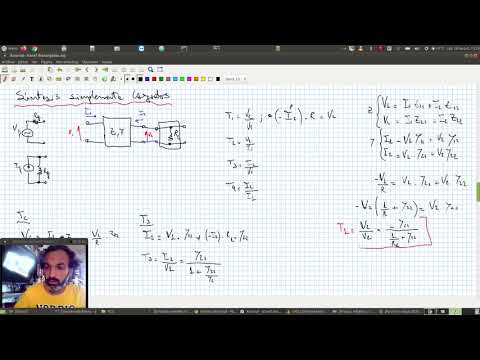

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo('PYGjVKhuDNQ', width=800, height=300)

para transferencias simplemente cargadas.

+ Ojo con los componentes de cierre. Prestar atención a las condiciones de medición de las restricciones (parámetros, transferencias, etc)
+ Verificar la topología obtenida analizando las transferencias prescritas en sus puntos clave, es decir extremos de banda, ceros de transferencia, etc.

Bonus:

+ +20 💎 Simulación simbólica de la función transferencia (vale pedir ayuda al profe)
+ +20 🎓 Simulación circuital de la red obtenida (ya lo deberían saber hacer)
+ +5 🍺 Presentación en jupyter notebook

## Resolucion 1):
### Simulación simbólica de la función transferencia:

In [17]:
import sys
!{sys.executable} -m pip install schemdraw

Remocion de RL
Siendo:

<IPython.core.display.Latex object>

con 

<IPython.core.display.Latex object>

Remocion de tanque R3-C2
Siendo:

<IPython.core.display.Latex object>

con 

<IPython.core.display.Latex object>

Remocion de tanque R2-C1
Siendo:

<IPython.core.display.Latex object>

con 

<IPython.core.display.Latex object>

Finalmente G1:

<IPython.core.display.Latex object>

Verificamos la transferencia:

<IPython.core.display.Latex object>

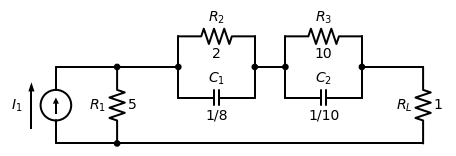

In [18]:
import schemdraw as schem
import schemdraw.elements as e
import sympy as sp
from IPython.display import display, Latex

def paralelo(a, b):
    return (a*b)/(a+b)

s = sp.symbols("s", complex=True)

Z22 = (6*(s+2)*(s+6))/((s+4)*(s+1))

RL = 1
Z2 = sp.factor(sp.simplify(sp.expand(Z22 - 1)))
print('Remocion de RL\nSiendo:', end="")
display(Latex("$Z_2 = Z_{22} - K_\infty$"))
print("con ", end="")
display(Latex(f"$K_\infty=R_L={RL}\\rightarrow Z_2 = {sp.latex(Z2)}$"))

K1 = sp.limit(sp.expand(Z2*(s+1)), s, -1)
Z4 = sp.factor(sp.simplify(sp.expand( Z2 - ((K1)/(s+1)) )))
print('Remocion de tanque R3-C2\nSiendo:', end="")
display(Latex("$Z_4 = Z_2 - \\frac{K_1}{s+1}$"))
print("con ", end="")
display(Latex(f"$K_1={K1}\\rightarrow Z_4 = {sp.latex(Z4)}$"))

K2 = sp.limit(sp.expand(Z4*(s+4)), s, -4)
Z6 = sp.factor(sp.simplify(sp.expand( Z4 - ((K2)/(s+4)) )))
print('Remocion de tanque R2-C1\nSiendo:', end="")
display(Latex("$Z_6 = Z_4 - \\frac{K_2}{s+4}$"))
print("con ", end="")
display(Latex(f"$K_2={K2}\\rightarrow Z_6 = {sp.latex(Z6)}$"))

G1 = 1/Z6
print("Finalmente G1:", end="")
display(Latex(f"$G_1 = {G1}$"))

Ta = sp.Matrix([[1, 0],[G1, 1]])
Tb = sp.Matrix([[1, paralelo(K1, (K1/s)) + paralelo(1/(4/K2), K2/s) + RL],[0, 1]])
                             
TT = Ta * Tb

verif = sp.factor(sp.simplify(sp.expand(1/TT[1,1])))
print("Verificamos la transferencia:", end="")
display(Latex('$\\frac{-I_2}{I_1}= '+f'{sp.latex(verif)}$'))

d = schem.Drawing(unit=2.5)

It = d.add(e.SourceI(), d='up')
d.labelI(It, arrowlen=1.5, arrowofst=0.8, label='$I_1$')

d.add(e.LINE, d='right', l=2)
d.add(e.DOT)
d.push()
R1 = d.add(e.RES, d='down', label='$R_1$', botlabel=f'{1/G1}')
d.pop()

d.add(e.LINE, d='right', l=2)
d.add(e.DOT)
d.push()
d.add(e.LINE, d='up', l=1)
R2 = d.add(e.RES, d='right', label='$R_2$', botlabel=f'{1/(4/K2)}')
d.add(e.LINE, d='down', l=1)
d.pop()
d.add(e.LINE, d='down', l=1)
C1 = d.add(e.CAP, d='right', label='$C_1$', botlabel=f'{1/K2}')
d.add(e.LINE, d='up', l=1)
d.add(e.DOT)

d.add(e.LINE, d='right', l=1)
d.add(e.DOT)
d.push()
d.add(e.LINE, d='up', l=1)
R3 = d.add(e.RES, d='right', label='$R_3$', botlabel=f'{K1}')
d.add(e.LINE, d='down', l=1)
d.pop()
d.add(e.LINE, d='down', l=1)
C2 = d.add(e.CAP, d='right', label='$C_2$', botlabel=f'{1/K1}')
d.add(e.LINE, d='up', l=1)
d.add(e.DOT)

d.add(e.LINE, d='right', l=2)
RL = d.add(e.RES, d='down', label='$R_L$', botlabel=f'{RL}')
d.add(e.LINE, d='left', tox=R1.end)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=It.end)

d.draw()

### Simulación circuital de la red obtenida:

+ Analisis de la transferencia:
    + Con $s\dashrightarrow \infty$ la transferencia presenta un valor constante igual a $\frac{5}{6}$ que se puede traducir en una ganancia de -1,5836dB
    + Con $s\dashrightarrow 0$ la transferencia vale $\frac{5}{18}$ por lo que la ganancia de la transferencia en continua es de -11,126dB
    
<img src="TS13_1.png">
<img src="TS13_1_osc.png">

## Resolucion 2):
### Simulación simbólica de la función transimpedancia:

Remocion de C3
Siendo:

<IPython.core.display.Latex object>

con 

<IPython.core.display.Latex object>

Remocion de tanque L1-C2
Siendo:

<IPython.core.display.Latex object>

con 

<IPython.core.display.Latex object>

Finalmente C1:

<IPython.core.display.Latex object>

Verificamos la transferencia:

<IPython.core.display.Latex object>

Ahora desnormalizamos los componente por RL=9:
Verificamos la transferencia:

<IPython.core.display.Latex object>

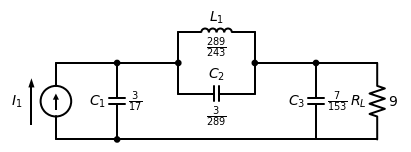

In [19]:
Z22 = (2*(s**2 + (1/2)))/(s*((s**2) + 2))

C3 = sp.simplify(sp.expand(1/(Z22*s))).subs(s**2, -9)

Y2 = sp.factor(sp.simplify(sp.expand((1/Z22) - (C3*s))))
print('Remocion de C3\nSiendo:', end="")
display(Latex("$Y_2 = \\frac{1}{Z_{22}} - K_\infty s$"))
print("con ", end="")
display(Latex(f"$K_\infty={C3}\\rightarrow Y_2 = {sp.latex(Y2)}$"))

#IMPORTANTE! Sympy no me logra calcular K1 (nan), asi que lo impondre segun mis calculos
#K1 = sp.simplify(sp.expand((1/Y2)*(((s**2) + 9)/s))).subs(s**2, -9)

K1 = 289/27
Z4 = sp.factor(sp.simplify(sp.expand( (1/Y2) - ((K1*s)/((s**2) + 9)) )))
print('Remocion de tanque L1-C2\nSiendo:', end="")
display(Latex("$Z_4 = Z_2 - \\frac{K_1 s}{s^2 + 1}$"))
print("con ", end="")
display(Latex(f"$K_1={K1}\\rightarrow Z_4 = {sp.latex(Z4)}$"))

C1 = sp.simplify(sp.expand(1/(Z4*s))).subs(s**2, sp.oo)
print("Finalmente C1:", end="")
display(Latex(f"$C_1 = {C1}$"))

Ta = sp.Matrix([[1, 0],[C1*s, 1]])
Tb = sp.Matrix([[1, paralelo((K1/9)*s, (K1/s))],[0, 1]])
Tc = sp.Matrix([[1, 0],[s*C3 + 1, 1]])
                             
TT = Ta * Tb * Tc

verif = sp.factor(sp.simplify(sp.expand(1/TT[1,0])))
print("Verificamos la transferencia:", end="")
display(Latex('$\\frac{V_2}{I_1}= '+f'{sp.latex(verif)}$'))

print("Ahora desnormalizamos los componente por RL=9:")
Ta = sp.Matrix([[1, 0],[(3/17)*s, 1]])
Tb = sp.Matrix([[1, paralelo( 289*s/27, 1/(s*(3/289)) )],[0, 1]])
Tc = sp.Matrix([[1, 0],[(s*7/153) + (1/9), 1]])
                             
TT = Ta * Tb * Tc

verif = sp.factor(sp.simplify(sp.expand(1/TT[1,0])))
print("Verificamos la transferencia:", end="")
display(Latex('$\\frac{V_2}{I_1}= '+f'{sp.latex(verif)}$'))

d = schem.Drawing(unit=2.5)

It = d.add(e.SourceI(), d='up')
d.labelI(It, arrowlen=1.5, arrowofst=0.8, label='$I_1$')

d.add(e.LINE, d='right', l=2)
d.add(e.DOT)
d.push()
C1 = d.add(e.CAP, d='down', label='$C_1$', botlabel='$\\frac{3}{17}$')
d.pop()

d.add(e.LINE, d='right', l=2)
d.add(e.DOT)
d.push()
d.add(e.LINE, d='up', l=1)
L1 = d.add(e.INDUCTOR, d='right', label='$L_1$', botlabel='$\\frac{289}{243}$')
d.add(e.LINE, d='down', l=1)
d.pop()
d.add(e.LINE, d='down', l=1)
C2 = d.add(e.CAP, d='right', label='$C_2$', botlabel='$\\frac{3}{289}$')
d.add(e.LINE, d='up', l=1)
d.add(e.DOT)

d.add(e.LINE, d='right', l=2)
d.add(e.DOT)
d.push()
C3 = d.add(e.CAP, d='down', label='$C_3$', botlabel='$\\frac{7}{153}$')
d.pop()

d.add(e.LINE, d='right', l=2)
RL = d.add(e.RES, d='down', label='$R_L$', botlabel='9')
d.add(e.LINE, d='left', tox=C1.end)
d.add(e.DOT)
d.add(e.LINE, d='left', tox=It.end)

d.draw()

### Simulación circuital de la red obtenida:

+ Analisis de la transimpedancia:
    + Con $s\dashrightarrow \infty$ la transimpedancia presenta un cero
    + Con $s\dashrightarrow 0$ la transimpedancia vale 9 por lo que el modulo en continua vale 19.084dB
    + Con $s^2\dashrightarrow -9$ la transimpedancia presenta un cero de transmision (f=477mHz)
    
<img src="TS13_2.png">
<img src="TS13_2_osc.png">